In [1]:
import pandas as pd
pd.__version__

'1.0.3'

#### task 1 : 두 column을 합쳐서 한 column으로 만들기

#### method 1

In [2]:
df = pd.DataFrame(data={"id":[1,2,3,4,5], "rack_id":[1,5,4,3,2], "bank_id":[1,3,3,3,3]})
print(df)

   id  rack_id  bank_id
0   1        1        1
1   2        5        3
2   3        4        3
3   4        3        3
4   5        2        3


In [3]:
df["rack_bank_id"] = df["rack_id"].astype(str) + str("_") + df["bank_id"].astype(str)
df = df.drop(["rack_id", "bank_id"], axis=1)
print("---------- result ----------")
print(df)

---------- result ----------
   id rack_bank_id
0   1          1_1
1   2          5_3
2   3          4_3
3   4          3_3
4   5          2_3


#### method 2

In [4]:
df = pd.DataFrame(data={"id":[1,2,3,4,5], "rack_id":[1,5,4,3,2], "bank_id":[1,3,3,3,3]})
print(df)

   id  rack_id  bank_id
0   1        1        1
1   2        5        3
2   3        4        3
3   4        3        3
4   5        2        3


In [5]:
df2 = df["rack_id"].astype(str) + str("_") + df["bank_id"].astype(str)

In [6]:
pd.DataFrame(data={"rack_bank_id":df2})

,rack_bank_id
0,1_1
1,5_3
2,4_3
3,3_3
4,2_3


In [7]:
df = df.drop(["rack_id", "bank_id"], axis=1)

In [8]:
df = pd.concat([df, pd.DataFrame(data={"rack_bank_id":df2})], axis=1)
print("---------- result ----------")
print(df)

---------- result ----------
   id rack_bank_id
0   1          1_1
1   2          5_3
2   3          4_3
3   4          3_3
4   5          2_3


#### task 2 : 특정 column 값을 기준으로 여러개 plot  겹쳐 그리기

In [2]:
df = pd.DataFrame(data={"x":[1,2,3,4,1,2,3,4], "y":[1,2,3,4,4,3,2,1], "label":[1,1,1,1,2,2,2,2]})
print(df)

   x  y  label
0  1  1      1
1  2  2      1
2  3  3      1
3  4  4      1
4  1  4      2
5  2  3      2
6  3  2      2
7  4  1      2


In [12]:
df.set_index(["label", "x"]).unstack(0)

y   
label  1  2
x          
1      1  4
2      2  3
3      3  2
4      4  1

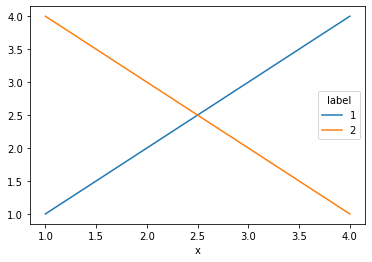

In [10]:
df.set_index(["label", "x"])["y"].unstack(0).plot()

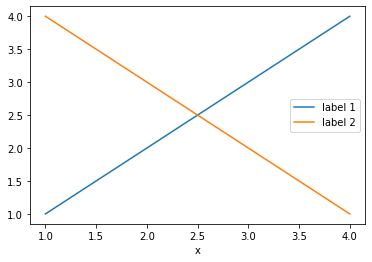

In [50]:
ax = df[df["label"]==1].plot(x="x", y="y", label="label 1")
df[df["label"]==2].plot(x="x", y="y", ax=ax, label="label 2")

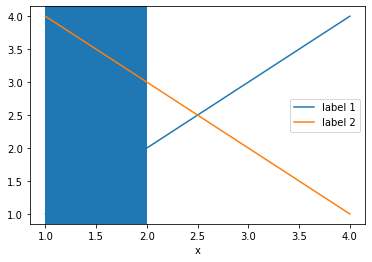

In [53]:
ax = df[df["label"]==1].plot(x="x", y="y", label="label 1")
df[df["label"]==2].plot(x="x", y="y", ax=ax, label="label 2")
ax.axvspan(1,2)